In [3]:
# import make_blobs from sklearn
from sklearn.datasets import make_blobs

# import matplotlib
import matplotlib.pyplot as plt

# import Kmeans from sklearn
from sklearn.cluster import KMeans

# import numpy
import numpy as np

In [4]:
# generate clusters 
X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  random_state=0)

In [18]:
X;

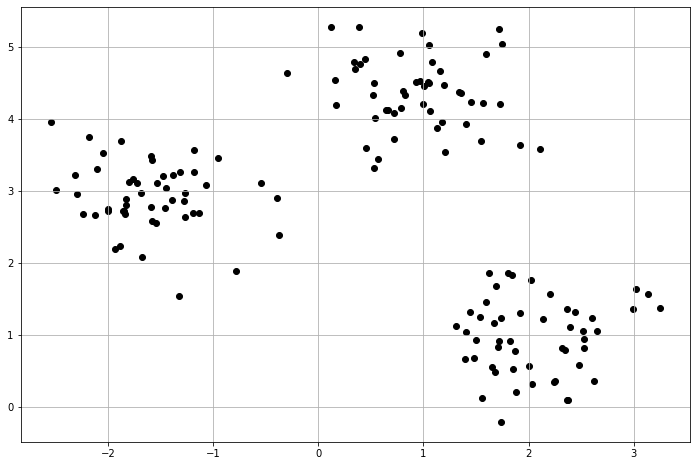

In [5]:
# set figure size
plt.rcParams["figure.figsize"] = (12,8)

# plot clusters
# X: the euclidean coordinataes of the point
# y: the "center" the x-values belong to (0, 1, or 2)

plt.scatter(X[:,0],
            X[:,1],
            c='black',
            marker='o')
plt.grid()
plt.show()

## Clustering

In [6]:
km = KMeans(n_clusters=3, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

In [7]:
# fit and predict
y_km = km.fit_predict(X)

In [8]:
set(y_km)

{0, 1, 2}

In [13]:
# X: the euclidean coordinataes of the point
# y: the "center" the x-values belong to (0, 1, or 2)

def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        #print(y_res == cluster)
        #print(x)
        #break
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

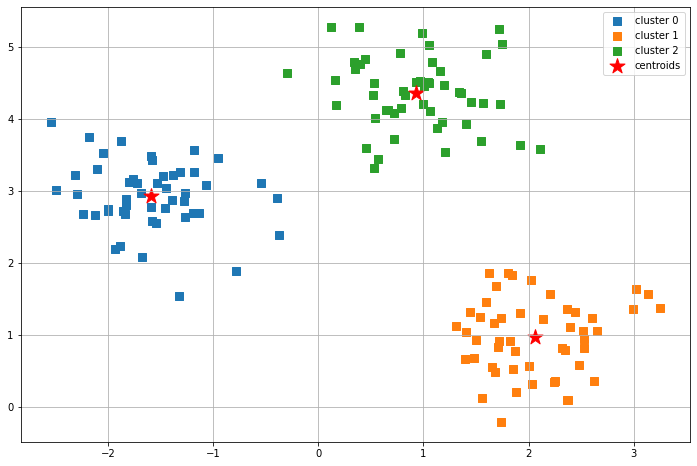

In [14]:
 # plot clustering result
plot_clusters(X, y_km, plt_cluster_centers= True)

In [30]:
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

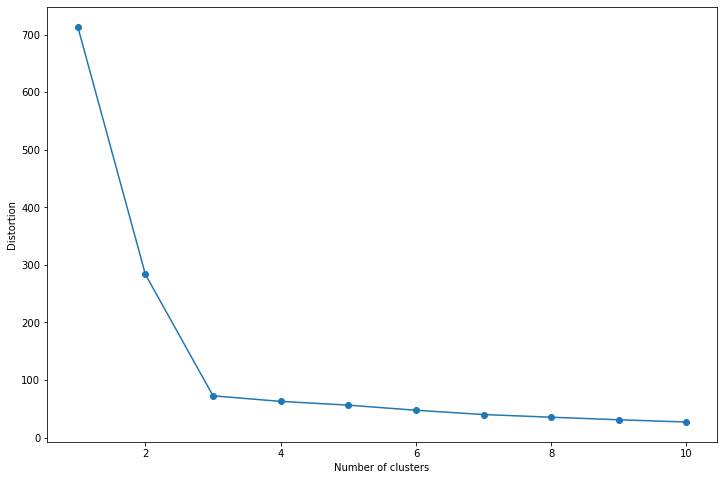

In [31]:
# elbow rule
plot_distortion(X,max_clusters=10)

# Hierarchical Models

In [17]:
# import libraries
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

# Generate clusters 
X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  random_state=0)


def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

In [19]:
# aglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# cluster hierarchy
import scipy.cluster.hierarchy as sch

In [20]:
# create an object
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 3)

In [21]:
# fit and predict
y_hc = ac.fit_predict(X)

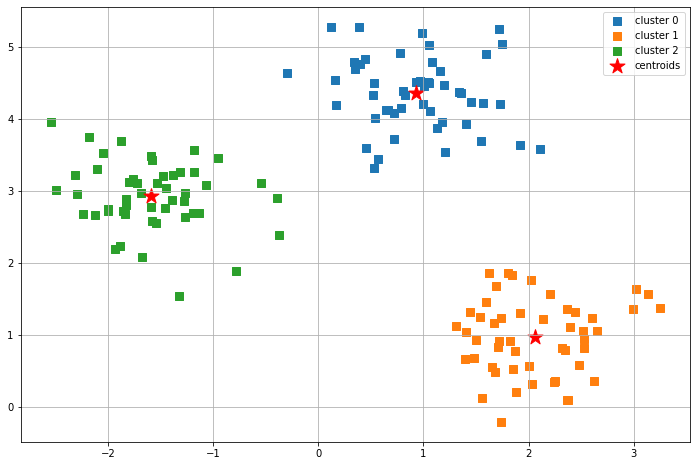

In [23]:
# Plot clustering result
plot_clusters(X,y_hc, plt_cluster_centers = True)

In [24]:
# define plot_dendrogram function
def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

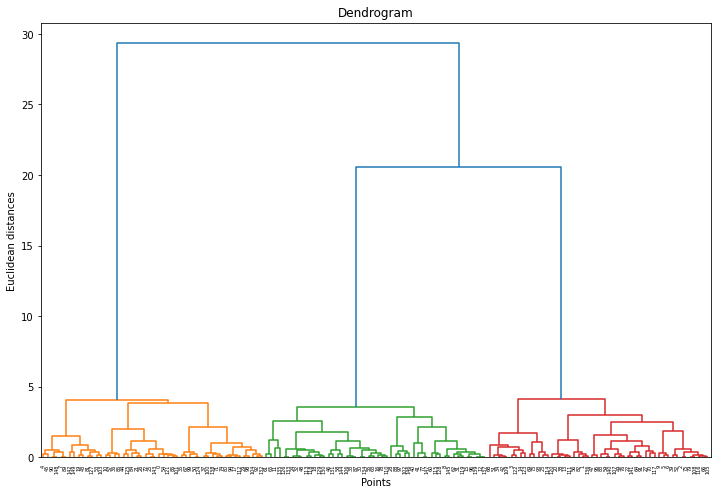

In [25]:
# Plot dendrogram
plot_dendrogram(X)

# Density Models

### DBSCAN

In [30]:
# import libraries
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

# generate clusters 
X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  random_state=0)


def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

In [26]:
# import make_moons from sklearn
from sklearn.datasets import make_moons

# import DBSCAN
from sklearn.cluster import DBSCAN

In [27]:
db = DBSCAN(eps=0.5,
            min_samples=5,
            metric='euclidean')

In [28]:
# fit and predict
y_db = db.fit_predict(X)

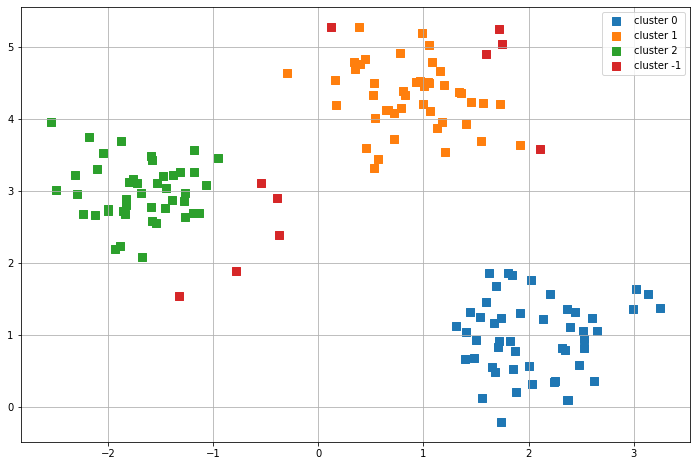

In [31]:
# Plot DBSCAN clusters
plot_clusters(X,y_db)

### Non-spherical Data


In [32]:
# generate moon-shape data
X, y = make_moons(n_samples=200,
                  noise=0.05,
                  random_state=0)

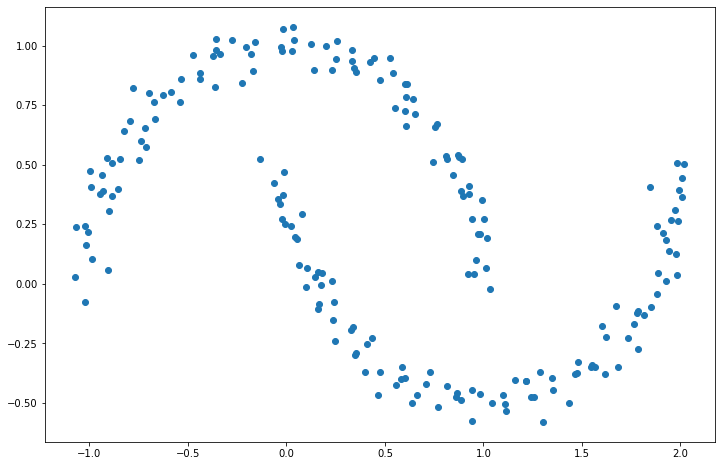

In [33]:
# plot data
plt.scatter(X[:,0], X[:,1])
plt.show()

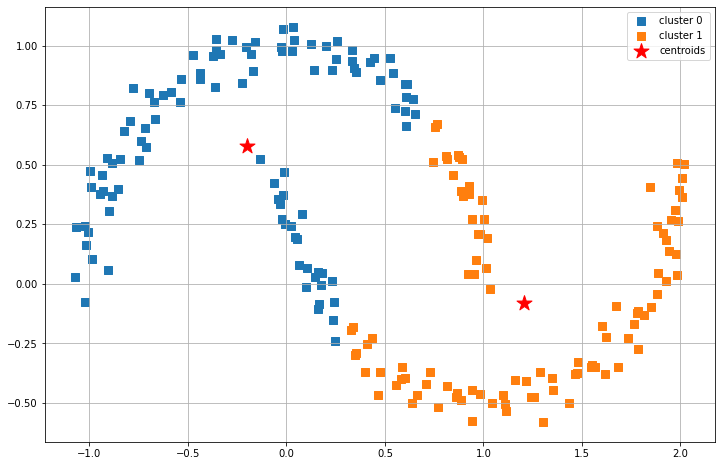

In [34]:
# import k-means
from sklearn.cluster import KMeans

# Fit K-means
km = KMeans(n_clusters=2, # how many clusters we expected 
            n_init=10,
            random_state=0,)

y_km = km.fit_predict(X)

# plot K-means clusters
plot_clusters(X,y_km,plt_cluster_centers=True)

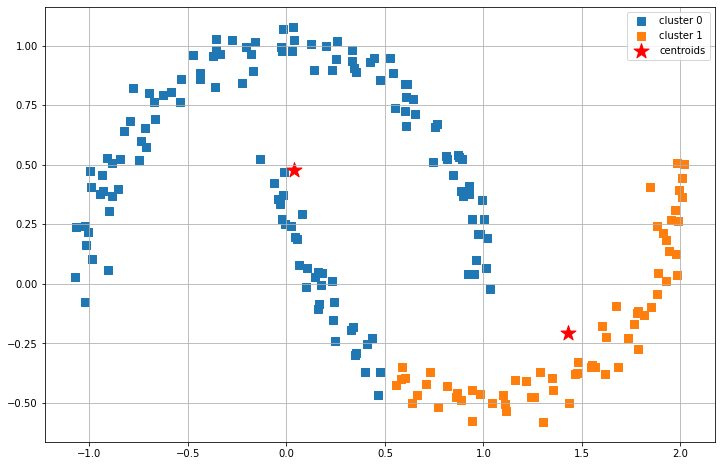

In [36]:
# import Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# fit Agglomerative clustering
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 2)
y_hc = ac.fit_predict(X)

# plot HC clusters
plot_clusters(X,y_hc, plt_cluster_centers=True)

Neither KMeans nor Agglomerative Clustering can deal with non-spherical clusters.

Instead, try DBSCAN:

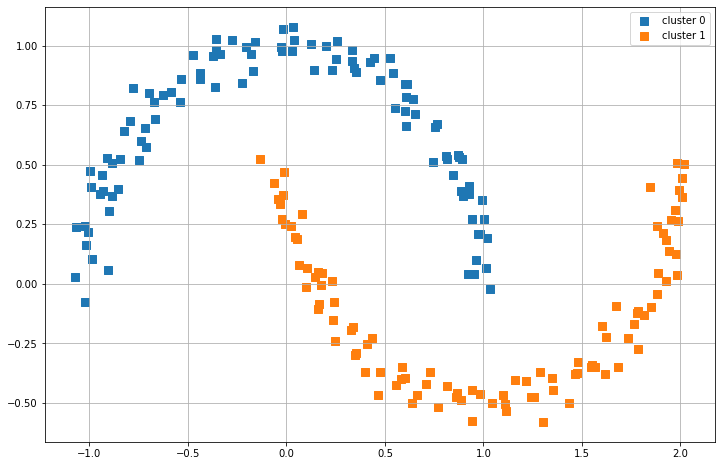

In [37]:
# fit DBSCAN
db = DBSCAN(eps=0.2,
            min_samples=5,
            metric='euclidean')

y_db = db.fit_predict(X)

# plot DBSCAN clusters
plot_clusters(X,y_db)

However, DBSCAN is not the best for sparse points that are still part of a cluster because they will be treated as outliers. We need to be careful about this when using density models in the future.